<h1 align='center'> Statistical inference: part 1</h1>

<h2> Introduction </h2>

In data analysis we usually use a sample dataset in representation of a larger population, and under the condition of not getting more data we need to use this sample to make an inference of the population it comes from. In addition, we will be mostly interested in examining whether a given pattern found in data represents a true phenomenom or it just due to chance (e.g. Because of sampling or some some of random disturbance in the data generator process). To inspect these issues, statistical inference comes into play, and in this notebook we will explore some important techniques to contrast hypothesis based on datasets.

<h2> Law of Large Numbers </h2>

In a coin tossing experiment we would expect the probability of gettin heads to be equal to 0.5; this means that if we toss 100 times this coin, we will be getting heads 50 times of the time, if we toss 200, then we wil be getting heads 100 times, and so on. But, how do we actually know that the coin is fair, and that we will be having a 50-50 chance of getting heads or tails? We could do the experiment of tossing the coin, say 10, 20, 30 times and see how the amount of heads we get is close enough to 50% of the number ot tossess. This is a practical use of what we call the **Law of Large Numbers**, which states that by performing the same experiment a very large number of times we would see that the average of the result we are examining will be close enough to the true expected value of the distribution (the larger the number of trials the closer these two values).

Let's see the **Law of Large Numbers** in action by programming a coin flipping experiment 1.000 times, and watching how many Heads we would be getting deppending on the number of tossess:

In [1]:
# Importing libraries
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(12345)

p = 0.5 # probability of getting heads
N = 1000 # number of experiments
s = ['H', 'T'] # possible results
freq = [] # frequency list
prop = [] # proportion list

for trials in range(1, N+1):
    
    for t in range(1, trials + 1):
        result = random.choice(s) # randomly choosing Heads or Tails

        freq.append(result) # Add final result to the list

    
    count = freq.count('H') # Counting how many Heads we got in all the trials

    p = count/trials # Proportion of Heads in all the trials
    
    freq = [] # Resseting the frequency list
    prop.append(p) # Adding the proportion to the propotions list

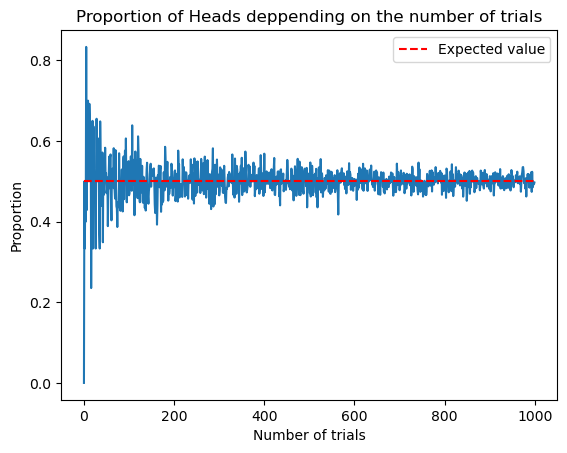

In [2]:
plt.plot(prop)
plt.plot([0, 1000], [0.5, 0.5], '--', color='r', label='Expected value')
plt.title('Proportion of Heads deppending on the number of trials')
plt.xlabel('Number of trials')
plt.ylabel('Proportion')
plt.legend()

There are two important facts we can see from the above graph:

1. As the number of trials increase the proportion of Heads approaches it's true probability
2. As the number of trials increase the variance of the outcomes decreases. Note that there is more variation in the proportion of Heads when the number of tossess is little.

This is a way to see the **Law of Large Numbers** in action.

<h2> Point estimators </h2>

Suppose we have a population of size $N$ and we currently have some data of $n$ individuals of that population ($n<N$), if we wish to estimate the arithmetic mean of a certain variable $x$ in the population, a good way to go is to calculate the mean in the sample dataset we have and infer that the population mean will be close to this value. However, we also want to know how likely is that we are wrong about our inference or how far from the reality our inference is likely to be.

Note that for a given value of $N$ there are $\binom{n}{N}$ different samples of size $n$ we could possible draw, which mean that we would get a different estimation for each one of these samples, and we could not possibly compute them all in practice. Fortunately, statisticians have learn how to deal with this and have defined some estimators with useful properties. Thus, a point estimator is a formula to compute a statistic based on a sample data in order to infer a true population value from it.

<h3> Consistency </h3>

Let $\theta$ be an estimator of a population parameter $\Theta$, and $\theta_0$  a given estimation, we say that $\theta$ is a consistent estimator of $\Theta$ if the larger the sample size, the closer $\theta_0$ is to $\Theta$. This is,

$$p\lim_{n \rightarrow \infty} \theta = \Theta$$

In other words, an estimator is called consistent if it converges to what we want to estimate, and note that this is what we saw in our **Law of Large Numbers** coin-flipping simulation.

<h3> Unbiasness </h3>

Since we could draw many different sample sets from a population, we would find a different estimation from each one of them, and regardless of the sample we draw, our estimation will likely differ somewhat from the true population parameter; however, we wish to be right on average, this means that if we draw all the samples (theoretically), estimate in each one of them and compute the arithmetic mean of all the estimations, we would get the true value of the population parameter. If a given estimator $\theta$ meets this property, we say it is an unbiased estimator of $\Theta$, this is:

$$E[\theta] = \Theta$$

<h2> The Central Limit Theorem </h2>

The Central Limit Theorem is perhaps the most known and important result of all statistics, and it states that the sample distribution of any standardized variable becomes that of that normal distribution with mean zero and variance 1. In this sense, let $\mathbf{x}$ be some random variable, then by the Central Limit Theorem 

$$\frac{\mathbf{x} - \bar{x}}{s/\sqrt{n}} \sim N(0, 1)$$

Where $\bar{x}$ is the sample mean of $\mathbf{x}$, $s$ is the sample standard deviation of $\mathbf{x}$ and $N(0, 1)$ is the normal distribution with mean 0 and variance 1.

To see these result in practice, let's simulate some random variable and see how its mean behave in large numbers.

/var/folders/7v/mlpbd2vj15s13pz4rjm4bq1m0000gn/T/ipykernel_6134/3361809141.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  s_sample = (sample - np.mean(sample))/(np.std(sample)/np.sqrt(k))


Text(0.5, 1.0, 'Sample distribution of the mean')

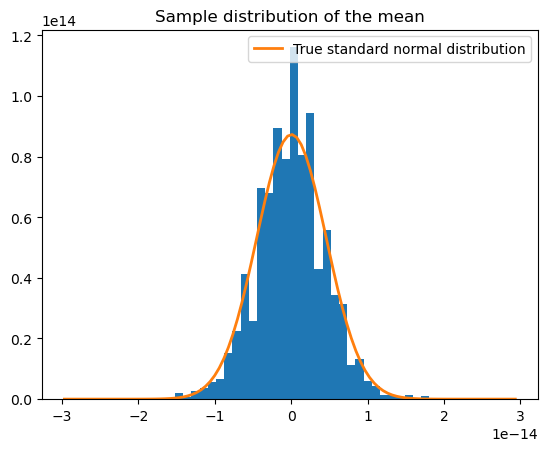

In [3]:
from scipy.stats import norm

random.seed(1234)

x = []
for k in range(1000):
    
    x.append(random.randint(0, 100))

means = []

for k in range(5000):
    
    sample = random.sample(x, 10)
    
    s_sample = (sample - np.mean(sample))/(np.std(sample)/np.sqrt(k))
    
    means.append(np.mean(s_sample))
    
plt.hist(means, bins=50, density=True)

mu, std = norm.fit(means) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, '-', linewidth=2, label='True standard normal distribution')

plt.legend()
plt.title('Sample distribution of the mean')

As an additional exercise let's inspect the probability distribution of the proportions computed in our coin-tossing simulation:

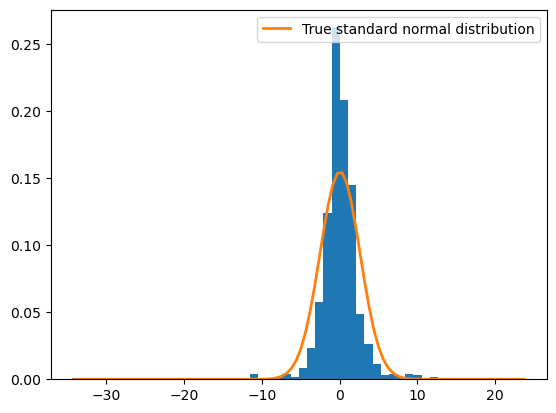

In [4]:
s_prop = [(x - 0.5)*2*np.sqrt(1000) for x in prop]

plt.hist(s_prop, bins=50, density=True);

mu, std = norm.fit(s_prop) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, '-', linewidth=2, label='True standard normal distribution')
plt.legend()

Note that here $\bar{x} = 0.5$ and $s = 0.5$, so:

$$\frac{x - 0.5}{0.5/\sqrt{N}} = (x - 0.5)2\sqrt{N}$$

<h3> Sample distribution of the arithmetic mean </h3>

From all our previous examples we can see that the sample distribution of the mean follows a normal distribution; and also that the sample estimator of the mean is both unbiased and consistent. Our experiment from the Law of Large Numbers allows us to verify this last part; the consistence property is evidently since the estimate approaches 0.5 as the number of trials increases, and the unbiasedness by taking the arithmetic mean of the `prop` vector and see how close it is to 0.5:

In [5]:
np.mean(prop)

0.5006323240878885

<h2> Sample distribution of the variance </h2>

Once explored the sample distribution of the mean, one could ask about the variance, is it's sample distribution also a normal distribution? To check this, let's run a simulation similar to the one we followed with the mean:

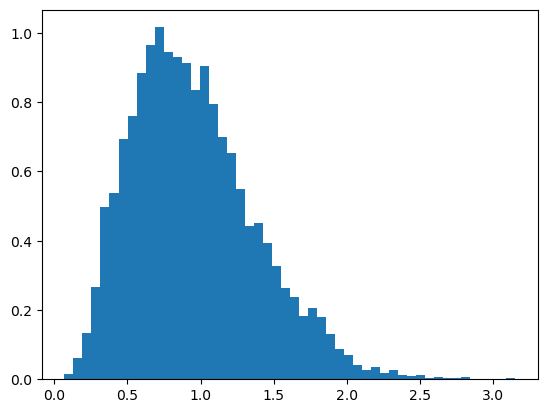

In [17]:
random.seed(1234)

x = np.random.normal(size=1000)
x = list(x)

sd = []

for k in range(5000):
    
    sample = random.sample(x, 10)
    
#    s_sample = (sample - np.mean(sample))/(np.std(sample)/np.sqrt(k))
    
    sd.append(np.var(sample))
    
plt.hist(sd, bins=50, density=True);

Note that this histogram is somewhat different from the ones we plot for the mean. The most important feature is that this distribution has a long tail on the right. In fact the standard deviation does not follow a normal distribution, but rather a $\chi^2$ (chi-squared) distribution. However, note that in this example we have specified that $x \sim N(0, 1)$; in fact the variance follows a $\chi^2$ distribution if the variable from which it is drawn follows a normal distribution. And, as we saw before, from the Central Limit Theorem we can find several sample distributions that follow a normal distribution, so its variance will follow a $\chi^2$ distribution.